In [1]:
from lightpy import (
    run_single_slit_experiment,
    run_double_slit_experiment,
    run_circular_aperture_experiment,
    run_all_checks
)

In [2]:
run_all_checks("single_slit_basic.json")


--- Simulation Parameter Checks ---
Fresnel Number (Fn): 0.0400
  -> Fraunhofer (far-field) approximation likely valid for theoretical comparison.

Nyquist Criterion (Spatial Resolution):
  Max reliable distance (X): 40.13 mm
  Max reliable distance (Y): 6.00 mm
  Plotting range (X): +/- 10.00 mm
  Plotting range (Y): +/- 5.00 mm
  -> Pixel sizes (dx, dy) are adequate for the specified plot range.

Wrap-Around Margin (Simulation Window Size):
  Current Lx: 50.00 mm, Ly: 10.00 mm
  Estimated Required Lx: 15.00 mm, Ly: 15.00 mm
  -> Consider increasing Lx_mm and Ly_mm significantly.
---------------------------------


  Simulation Params: Wavelength=500.0nm,           Lx=50.0mm, Ly=10.0mm, Z=0.50m
  Slit: Width=100.0um,           Height=5.0mm


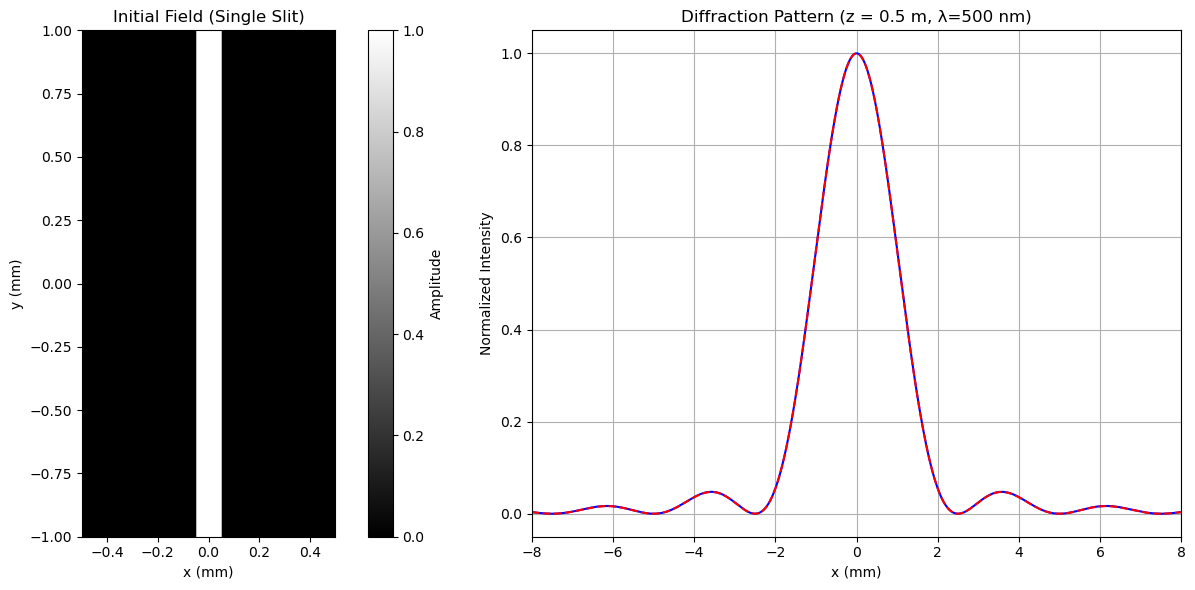

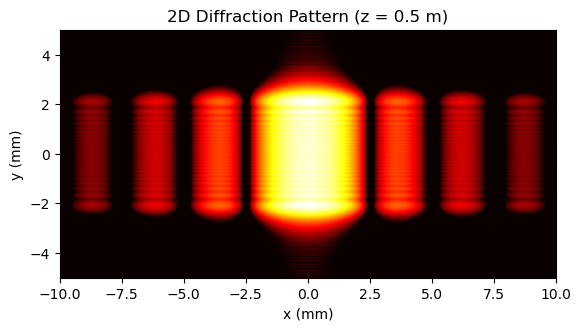

In [3]:
run_single_slit_experiment("single_slit_basic.json")


In [7]:
run_all_checks("double_slit_interference.json")


--- Simulation Parameter Checks ---
Fresnel Number (Fn): 0.0051
  -> Fraunhofer (far-field) approximation likely valid for theoretical comparison.

Nyquist Criterion (Spatial Resolution):
  Max reliable distance (X): 39.67 mm
  Max reliable distance (Y): 3.24 mm
  Plotting range (X): +/- 30.00 mm
  Plotting range (Y): +/- 2.00 mm
  -> Pixel sizes (dx, dy) are adequate for the specified plot range.

Wrap-Around Margin (Simulation Window Size):
  Current Lx: 80.00 mm, Ly: 50.00 mm
  Estimated Required Lx: 47.46 mm, Ly: 47.46 mm
  -> Simulation window (Lx, Ly) appears large enough to avoid wrap-around.
---------------------------------


  Simulation Params: Wavelength=632.8nm,           Lx=80.0mm, Ly=50.0mm, Z=0.50m
  Slits: Width=40.0um,           Height=5.0mm, Separation=200.0um


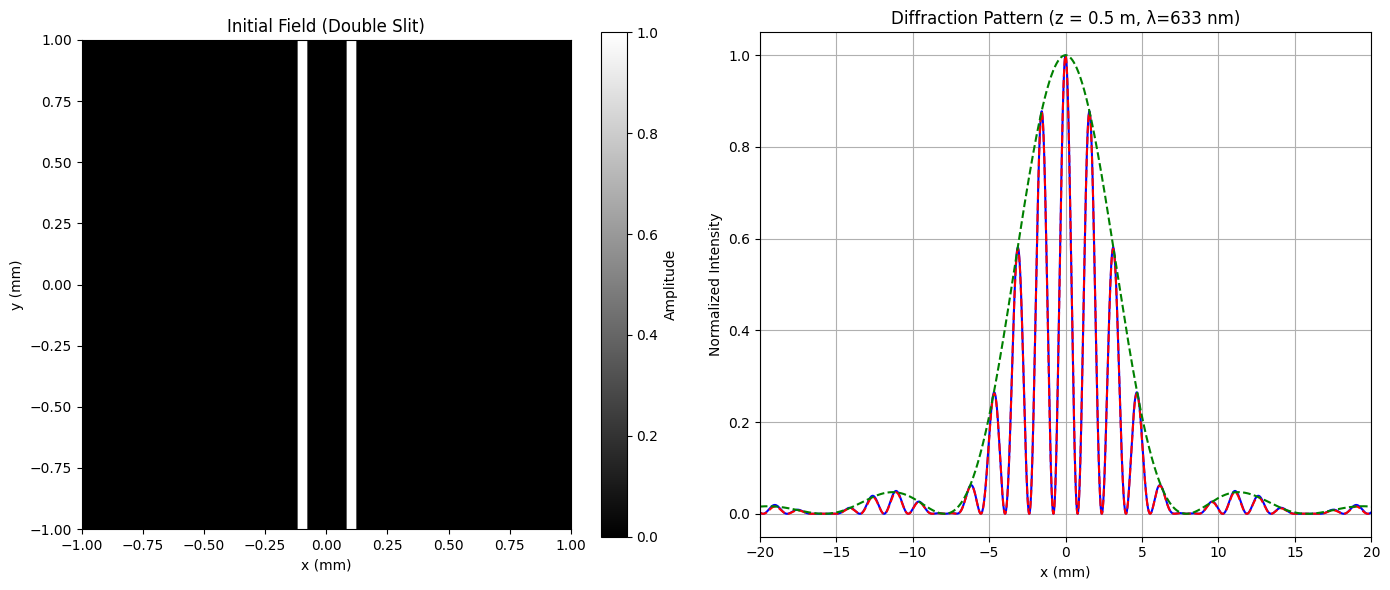

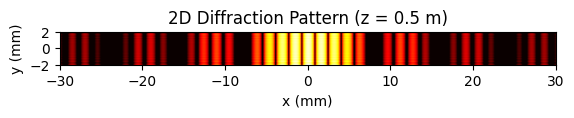

In [8]:
run_double_slit_experiment("double_slit_interference.json")

In [4]:
run_all_checks("circular_aperture_airy.json")


--- Simulation Parameter Checks ---
Fresnel Number (Fn): 0.0364
  -> Fraunhofer (far-field) approximation likely valid for theoretical comparison.

Nyquist Criterion (Spatial Resolution):
  Max reliable distance (X): 37.65 mm
  Max reliable distance (Y): 37.65 mm
  Plotting range (X): +/- 10.00 mm
  Plotting range (Y): +/- 10.00 mm
  -> Pixel sizes (dx, dy) are adequate for the specified plot range.

Wrap-Around Margin (Simulation Window Size):
  Current Lx: 30.00 mm, Ly: 30.00 mm
  Estimated Required Lx: 16.50 mm, Ly: 16.50 mm
  -> Simulation window (Lx, Ly) appears large enough to avoid wrap-around.
---------------------------------


In [ ]:
run_circular_aperture_experiment("circular_aperture_airy.json")


  Simulation Params: Wavelength=550.0nm,           Lx=30.0mm, Ly=30.0mm, Z=0.50m
  Aperture: Radius=0.10mm
